# 安装pytorch

# 深度学习经典流程

In [ ]:
#上面流程的伪代码
import torch
# 1. 加载数据和标签
data,label = 加载数据()
# 2. 设计网络结构
model = torch.nn.Sequential(
    torch.nn.Linear(第1层输入向量维数, 第1层输出的向量维数), # 输入向量维数其实就是当前这层的“神经元”的个数，输出向量维数和下一层输入向量维数要一样
    torch.nn.ReLU(), # 设置前面那一层的激活函数
    ....
    torch.nn.Linear(第n层输入向量维数, 第n层输出向量维数),
    torch.nn.ReLU(), # 设置前面那一层的激活函数
)
# 3. 设计损失函数，就是最简单的两点间距离(model_output-lable)^2
loss_fn = torch.nn.MSELoss(reduction='sum')
# 4. 设置用于自动调节神经网络参数的优化器
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# 5. 训练神经网络（重复训练10次）
for t in range(10):
    model_output = model(data)
    # 5.1 用所设计算损失(误差)函数计算误差
    loss = loss_fn(model_output, label)
    # 5.2 每次训练前清零之前计算的梯度(导数)
    optimizer.zero_grad()
    # 5.3 根据误差反向传播计算误差对各个权重的导数
    loss.backward()
    # 5.4 根据优化器里面的算法自动调整神经网络权重
    optimizer.step()

##########现在你已经训练好了#################
# 6. 用这个神经网络解决你的问题，比如手写数字识别，输入一个图片矩阵，然后模型返回一个数字
result_digit = model(img_mattrix)

# 理解 Tensor

In [1]:
from __future__ import print_function
import torch as t
t.__version__

'1.1.0'

In [2]:
# 构建 5x3 矩阵，只是分配了空间，未初始化
x = t.Tensor(5, 3)

In [5]:
# 使用[0,1]均匀分布随机初始化二维数组
x = t.rand(5, 3)  
x

tensor([[0.9044, 0.6508, 0.3733],
        [0.1609, 0.0863, 0.9537],
        [0.6969, 0.4444, 0.1294],
        [0.1012, 0.3715, 0.7128],
        [0.9223, 0.8155, 0.0151]])

In [4]:
#自定义二维数组
x = t.Tensor([[1,2],[3,4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [6]:
print(x.size()) # 查看x的形状
x.size()[1], x.size(1) # 查看列的个数, 两种写法等价

torch.Size([5, 3])


(3, 3)

In [7]:
y = t.rand(5, 3)
# 加法的第一种写法
x + y

tensor([[0.9967, 1.3346, 1.1809],
        [0.2247, 1.0827, 1.0660],
        [1.6908, 1.1105, 0.3317],
        [0.9556, 0.7512, 0.7482],
        [1.5752, 0.8984, 0.6632]])

In [8]:
# 加法的第二种写法
t.add(x, y)

tensor([[0.9967, 1.3346, 1.1809],
        [0.2247, 1.0827, 1.0660],
        [1.6908, 1.1105, 0.3317],
        [0.9556, 0.7512, 0.7482],
        [1.5752, 0.8984, 0.6632]])

In [9]:
# 加法的第三种写法：指定加法结果的输出目标为result
result = t.Tensor(5, 3) # 预先分配空间
t.add(x, y, out=result) # 输入到result
result

tensor([[0.9967, 1.3346, 1.1809],
        [0.2247, 1.0827, 1.0660],
        [1.6908, 1.1105, 0.3317],
        [0.9556, 0.7512, 0.7482],
        [1.5752, 0.8984, 0.6632]])

In [10]:
print('最初y')
print(y)

print('第一种加法，y的结果')
y.add(x) # 普通加法，不改变y的内容
print(y)

print('第二种加法，y的结果')
y.add_(x) # inplace 加法，y变了
print(y)

最初y
tensor([[0.0923, 0.6838, 0.8076],
        [0.0638, 0.9964, 0.1123],
        [0.9939, 0.6661, 0.2022],
        [0.8544, 0.3796, 0.0353],
        [0.6529, 0.0829, 0.6481]])
第一种加法，y的结果
tensor([[0.0923, 0.6838, 0.8076],
        [0.0638, 0.9964, 0.1123],
        [0.9939, 0.6661, 0.2022],
        [0.8544, 0.3796, 0.0353],
        [0.6529, 0.0829, 0.6481]])
第二种加法，y的结果
tensor([[0.9967, 1.3346, 1.1809],
        [0.2247, 1.0827, 1.0660],
        [1.6908, 1.1105, 0.3317],
        [0.9556, 0.7512, 0.7482],
        [1.5752, 0.8984, 0.6632]])


In [11]:
# Tensor的选取操作与Numpy类似
x[:, 1]

tensor([0.6508, 0.0863, 0.4444, 0.3715, 0.8155])

In [12]:
a = t.ones(5) # 新建一个全1的Tensor
a

tensor([1., 1., 1., 1., 1.])

In [13]:
b = a.numpy() # Tensor -> Numpy
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [14]:
import numpy as np
a = np.ones(5)
b = t.from_numpy(a) # Numpy->Tensor
print(a)
print(b) 

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [15]:
#Tensor和numpy对象共享内存，所以他们之间的转换很快，而且几乎不会消耗什么资源。但这也意味着，如果其中一个变了，另外一个也会随之改变??
b.add_(1) # 以`_`结尾的函数会修改自身
print(a) #b = t.from_numpy(a) # Numpy->Tensor,所以b变了，对应的a也变了
print(b) # Tensor和Numpy共享内存

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [16]:
#如果你想获取某一个元素的值，可以使用scalar.item。 
#直接tensor[idx]得到的还是一个tensor: 一个0-dim 的tensor，一般称为scalar.
scalar = b[0]
scalar#一个0-dim 的tensor

tensor(2., dtype=torch.float64)

In [17]:
scalar.size() #0-dim

torch.Size([])

In [18]:
scalar.item() # 使用scalar.item()能从中取出python对象的数值

2.0

In [19]:
tensor = t.tensor([2]) # 注意和scalar的区别
tensor,scalar

(tensor([2]), tensor(2., dtype=torch.float64))

In [20]:
tensor.size(),scalar.size() #1-dim 和 0-dim

(torch.Size([1]), torch.Size([]))

In [21]:
# 只有一个元素的tensor也可以调用`tensor.item()`
tensor.item(), scalar.item()

(2, 2.0)

In [30]:
tensor4 = t.tensor([[3,4],[1,2]]) # 新建一个包含 3，4 两个元素的tensor
tensor4,tensor4.size()

(tensor([[3, 4],
         [1, 2]]), torch.Size([2, 2]))

In [26]:
tensor = t.tensor([3,4]) # 新建一个包含 3，4 两个元素的tensor
tensor,tensor.size()

(tensor([3, 4]), torch.Size([2]))

In [31]:
tensor3 = t.tensor([[3],[4]]) # 新建一个包含 3，4 两个元素的tensor
tensor3,tensor3.size()

(tensor([[3],
         [4]]), torch.Size([2, 1]))

In [28]:
tensor2 = t.tensor([3]) # 新建一个包含 3，4 两个元素的tensor
tensor2,tensor2.size()

(tensor([3]), torch.Size([1]))

In [27]:
scalar = t.tensor(3)
scalar,scalar.size()

(tensor(3), torch.Size([]))

In [33]:
old_tensor = tensor
new_tensor = t.tensor(old_tensor)
new_tensor[0] = 1111
old_tensor, new_tensor

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


(tensor([3, 4]), tensor([1111,    4]))

In [35]:
new_tensor = old_tensor.detach() #使new_tensor 和 old_tensor指向同一块内存
new_tensor[0] = 1111
old_tensor, new_tensor

(tensor([1111,    4]), tensor([1111,    4]))

In [ ]:
# 在不支持CUDA的机器下，下一步还是在CPU上运行
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")
x = x.to(device)
y = y.to(device)
z = x+y

# PyTorch的autograd模块: 自动微分

In [36]:
# 为tensor设置 requires_grad 标识，代表着需要求导数
# pytorch 会自动调用autograd 记录操作
x = t.ones(2, 2, requires_grad=True)
# 上一步等价于
# x = t.ones(2,2)
# x.requires_grad = True
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [37]:
y = x.sum()
y# pytorch 会自动调用autograd 记录操作

tensor(4., grad_fn=<SumBackward0>)

In [38]:
y.grad_fn# pytorch 会自动调用autograd 记录操作

In [39]:
y.backward() # 反向传播,计算梯度

In [40]:
# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# 每个值的梯度都为1
x.grad # .grad 记录梯度

tensor([[1., 1.],
        [1., 1.]])

In [41]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [42]:
y.backward()
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [43]:
#反向传播之前需把梯度清零！！！
# 以下划线结束的函数是inplace操作，会修改自身的值，就像add_
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

# 神经网络

In [46]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): #继承 nn.Module
    def __init__(self): #构造函数：把网络中具有 可学习参数的层 放在 构造函数中
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        
        super(Net, self).__init__()# 等价于nn.Module.__init__(self)
        
        # 卷积层 '1'表示输入图片为单通道, '6'表示输出通道数，'5'表示卷积核为5*5
        self.conv1 = nn.Conv2d(1, 6, 5) 
        # 卷积层
        self.conv2 = nn.Conv2d(6, 16, 5) 
        # 仿射层/全连接层，y = Wx + b
        self.fc1   = nn.Linear(16*5*5, 120) 
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
        
        
    def forward(self, x):  #实现 nn.Module的forward方法，前向传播的计算过程
        # 卷积 -> 激活 -> 池化 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        # reshape，‘-1’表示自适应
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

In [47]:
net = Net() #实例化
print(net) #打印 网络结构

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [48]:
params = list(net.parameters())
print(len(params))

10


In [49]:
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [52]:
input = t.randn(1, 1, 32, 32) #𝑛𝑆𝑎𝑚𝑝𝑙𝑒𝑠=1，𝑛𝐶ℎ𝑎𝑛𝑛𝑒𝑙𝑠=1，𝐻𝑒𝑖𝑔ℎ𝑡=32，𝑊𝑖𝑑𝑡ℎ=32
print(input)
print(input.size())
out = net(input) #正向传播
out.size() #10个手写数字，10个类别

tensor([[[[-2.4157,  0.3548,  1.1107,  ...,  1.4344,  0.4507,  1.7374],
          [ 0.2202, -1.6681, -0.3863,  ..., -0.1833, -0.4232, -0.5931],
          [-0.5320, -0.7660,  0.1837,  ..., -0.0760,  0.1146,  0.5582],
          ...,
          [ 0.1752,  0.1834, -0.1811,  ...,  0.0694,  0.1028,  0.9293],
          [-0.1299, -1.8872, -1.3495,  ..., -0.1046,  1.0326,  0.3368],
          [-0.7864, -1.2458,  2.7532,  ...,  0.6215, -0.3607,  0.0608]]]])
torch.Size([1, 1, 32, 32])


torch.Size([1, 10])

In [55]:
net.zero_grad() # 所有参数的梯度清零
out.backward(t.ones(1,10)) # 反向传播
#t.ones(1,10) 干啥的？

# 损失函数

In [59]:
output = net(input) #定义 output 的结构
target = t.arange(0,10).view(1,10)  #目标输出
target = target.float()
criterion = nn.MSELoss() #定义 损失函数
loss = criterion(output, target) #应用损失函数
loss # loss是个scalar

tensor(28.4415, grad_fn=<MseLossBackward>)

In [60]:
# 运行.backward，观察调用之前和调用之后的grad
net.zero_grad() # 把net中所有可学习参数的梯度清零
print('反向传播之前 conv1.bias的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后 conv1.bias的梯度
tensor([ 0.0597, -0.0370,  0.0100, -0.0031, -0.0355, -0.0475])


# 优化器

In [61]:
import torch.optim as optim
#新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(), lr = 0.01)

# 在训练过程中
# 先梯度清零(与net.zero_grad()效果一样)
optimizer.zero_grad() 

# 计算损失
output = net(input)
loss = criterion(output, target)

#反向传播
loss.backward()

#更新参数
optimizer.step()

# 数据加载与预处理

# 小试牛刀：CIFAR-10分类

In [63]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

## torchvision

In [64]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化，具体含义是？？
                             ])
#class torchvision.transforms.Compose(transforms) 将多个transform组合起来使用。
#对Tensor进行变换 class torchvision.transforms.Normalize(mean, std) 给定 1均值：(R,G,B) 2方差：（R，G，B），将会把Tensor正则化。即：Normalized_image=(image-mean)/std。

### transforms.ToTensor()

In [ ]:
#把一个取值范围是[0,255]的PIL.Image 转换成 Tensor
img1 = Image.open('./Image/use_Crop.jpg')
 
t_out = transforms.ToTensor()(img1)

In [ ]:
#shape为(H,W,C)的numpy.ndarray，转换成形状为[C,H,W]，取值范围是[0,1.0]的Tensor??
n_out = np.random.rand(100,100,3)
print(n_out.dtype)
 
t_out = transforms.ToTensor()(n_out)
print(t_out.type())

In [ ]:
#将ndarray转化成PILImage
#初始化随机数种子
np.random.seed(0)
 
data = np.random.randint(0, 255, 300)
print(data.dtype)
n_out = data.reshape(10,10,3)
 
#强制类型转换
n_out = n_out.astype(np.uint8)
print(n_out.dtype)
 
img2 = transforms.ToPILImage()(n_out)
img2.show()

In [ ]:
#将Tensor转化成PILImage
t_out = torch.randn(3,10,10)
img1 = transforms.ToPILImage()(t_out)
img1.show()
#因为要求是FloatTensor类型，所以最好是不管此时的tensor是不是FloatTensor类型，都加一个强制转换再传进去。 
t_out = torch.randn(3,10,10)
img1 = transforms.ToPILImage()(t_out.float())
img1.show()

In [ ]:
#综合处理，ndarray->Tensor->PILImage
n_out = np.random.rand(100,100,3)
t_out = transforms.ToTensor()(n_out)
img2 = transforms.ToPILImage()(t_out.float())  #强制类型转换
img2.show()

### transforms.Normalize

## load data

In [65]:
# 训练集
trainset = tv.datasets.CIFAR10(
                    root='/home/cy/tmp/data/', 
                    train=True, 
                    download=True,
                    transform=transform)

100%|██████████████████████████████████████████████████████████████▉| 170418176/170498071 [01:14<00:00, 2609633.66it/s]

In [66]:
# 测试集
testset = tv.datasets.CIFAR10(
                    '/home/cy/tmp/data/',
                    train=False, 
                    download=True, 
                    transform=transform)

Files already downloaded and verified


In [67]:
trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)
testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

ship


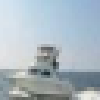

In [68]:
(data, label) = trainset[100]
print(classes[label]) #???

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

In [ ]:
trainloader = t.utils.data.DataLoader()
Dataloader是一个可迭代的对象，它
将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。
当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代。

       bird         car         dog       horse


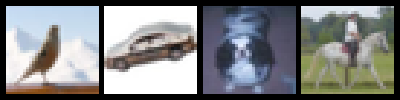

In [69]:
dataiter = iter(trainloader) #batch_size=4
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

## 定义网络

In [70]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x

In [71]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [72]:
#定义损失函数和优化器(loss和optimizer)
from torch import optim
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # momentum=0.9？？？？

## 训练网络
所有网络的训练流程都是类似的，不断地执行如下流程：输入数据，前向传播+反向传播，更新参数

In [73]:
t.set_num_threads(8) #num_threads 为8，线程数？
for epoch in range(2):  #共训练2个epoch
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): #??? i从0开始的意思？
        
        # 输入数据
        inputs, labels = data #一次迭代 batch_size为4
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels) 
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000)) #每2000个样本，计算平均loss值，打印
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.140
[1,  4000] loss: 1.801
[1,  6000] loss: 1.631
[1,  8000] loss: 1.549
[1, 10000] loss: 1.503
[1, 12000] loss: 1.441
[2,  2000] loss: 1.395
[2,  4000] loss: 1.340
[2,  6000] loss: 1.357
[2,  8000] loss: 1.304
[2, 10000] loss: 1.292
[2, 12000] loss: 1.282
Finished Training


## 预测

In [74]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数

# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = t.max(outputs, 1) #??
        total += labels.size(0) #??
        correct += (predicted == labels).sum() #??

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 56 %


# 在GPU训练

In [ ]:
#模型 从CPU转到GPU
device = t.device("cuda:0" if t.cuda.is_available() else "cpu")

net.to(device)
images = images.to(device)
labels = labels.to(device)

output = net(images)
loss= criterion(output,labels)
loss